#### Binary classification - Booking Cancellation

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

##### Read train dataset

In [2]:
import pandas as pd 
df = pd.read_csv('train_booking.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.shape

(42100, 19)

In [5]:
df.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
X = df.drop(columns=['booking_status','id'])
Y = df[['booking_status']]

In [8]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [9]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [10]:
Y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

#### Create preprocessing pipelins

In [11]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [12]:
### There is no any charater data in so no need to create the cat_pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.99805198, -0.73769133],
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -0.87015314, -0.73769133],
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -1.41540612, -0.73769133],
       ...,
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.2306589 , -0.73769133],
       [-1.75392524, -0.31345354, -0.99881361, ..., -0.10147907,
         0.41556686, -0.73769133],
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -1.06536717, -0.73769133]])

In [15]:
cols = num_pipe.get_feature_names_out()
cols

array(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'], dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,0.692156,0.409661,1.557404,1.585992,0.428551,-0.173408,-0.060506,-0.101479,0.954088,1.842849
42096,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.862087,-2.441040,0.497095,0.798456,-1.149928,-0.173408,-0.060506,-0.101479,3.233919,-0.737691
42097,0.151040,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,2.320411,0.409661,-0.209778,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.230659,-0.737691
42098,-1.753925,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.219810,0.409661,1.203968,-0.776617,-1.149928,-0.173408,-0.060506,-0.101479,0.415567,-0.737691


### Apply Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [18]:
xtrain.shape

(33680, 17)

In [19]:
xtest.shape

(8420, 17)

#### Create a neural network

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [28]:
model = Sequential()

## Add hidden layer 1

model.add(Dense(units=64,activation='relu',input_dim=xtrain.shape[1]))
model.add(Dropout(0.4))

## add hidden layer 2

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.3))

## Output layer Binary classification - Sigmoid

model.add(Dense(units=1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1152      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Comple model

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
842/842 [==============================] - 2s 2ms/step - loss: 0.5226 - accuracy: 0.7419 - val_loss: 0.4829 - val_accuracy: 0.7723
Epoch 2/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4857 - accuracy: 0.7699 - val_loss: 0.4751 - val_accuracy: 0.7772
Epoch 3/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4788 - accuracy: 0.7742 - val_loss: 0.4727 - val_accuracy: 0.7785
Epoch 4/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4713 - accuracy: 0.7790 - val_loss: 0.4699 - val_accuracy: 0.7821
Epoch 5/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4692 - accuracy: 0.7811 - val_loss: 0.4672 - val_accuracy: 0.7861
Epoch 6/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4684 - accuracy: 0.7840 - val_loss: 0.4674 - val_accuracy: 0.7856
Epoch 7/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4642 - accuracy: 0.7847 - val_loss: 0.4637 - val_accuracy: 0.7870

### Plot the leraring curve if the above model

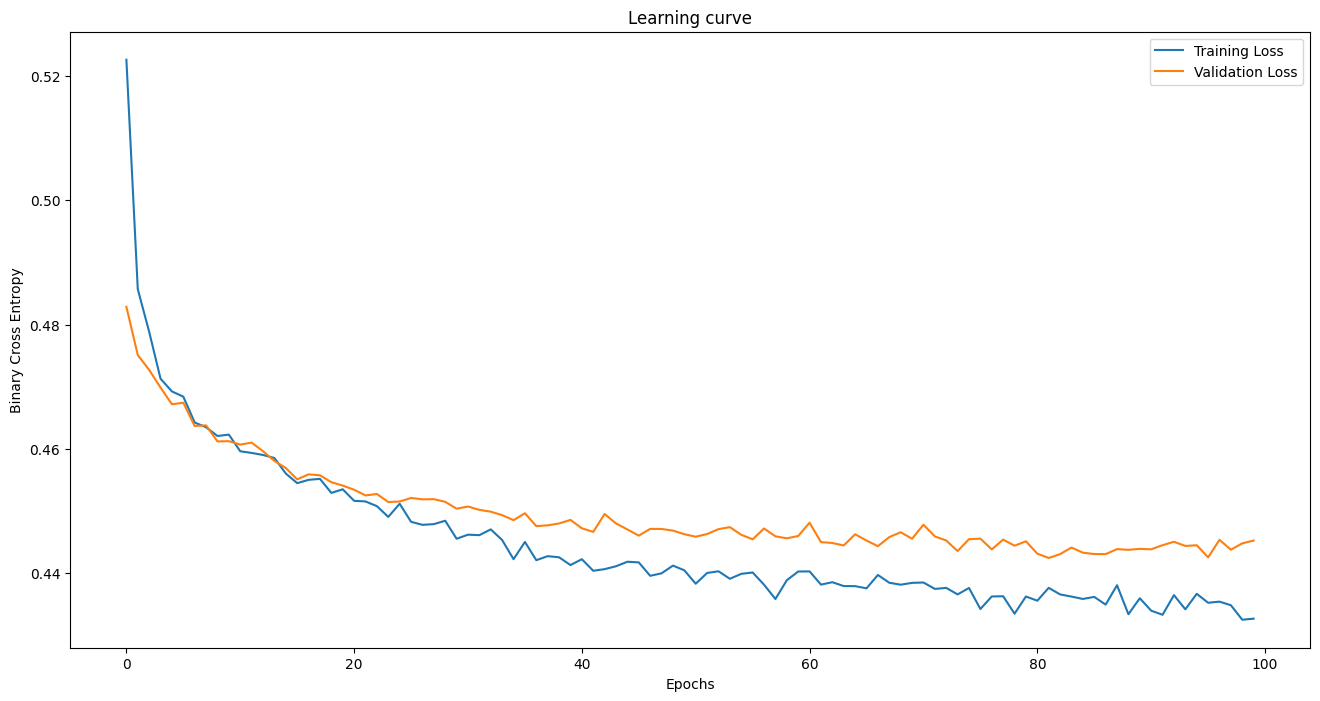

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning curve')
plt.legend()
plt.show()

### Evaluate the model

In [33]:
model.evaluate(xtrain,ytrain)

1053/1053 [==============================] - 1s 1ms/step - loss: 0.4192 - accuracy: 0.8116


[0.4191657304763794, 0.8116092681884766]

### Predict the probability

In [34]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

264/264 [==============================] - 0s 784us/step


In [36]:
yprob_tr[0:5]

array([[0.00378813],
       [0.23690291],
       [0.78514206],
       [0.8199652 ],
       [0.81756175]], dtype=float32)

In [39]:
## check for training
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr]
ypred_tr[0:5]

[0, 0, 1, 1, 1]

In [40]:
ytrain.head(5)

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [41]:
# Check for testing

In [42]:
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts]
ypred_ts[0:5]

[0, 1, 0, 0, 0]

In [43]:
ytest.head(5)

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


## Plot confusion matrics

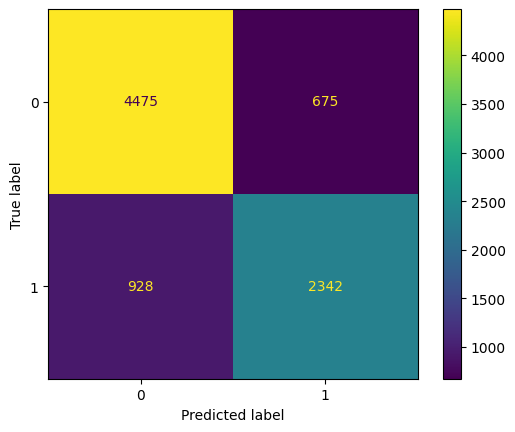

In [46]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf) 
cfd.plot()

### Save the model

In [47]:
model.save('BookingCancellation.keras')

### Load the model

In [50]:
from keras.models import load_model
nn = load_model('BookingCancellation.keras')
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1152      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Perform prediction of test_booking.csv

In [66]:
xnew = pd.read_csv('test_booking.csv')
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [67]:
xnew1 = xnew.drop(columns='id')
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [68]:
xnew_pre = num_pipe.transform(xnew1)
xnew_pre

array([[ 2.05600472, -0.31345354,  0.13025905, ..., -0.10147907,
         0.29709213,  1.84284918],
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.5268457 , -0.73769133],
       [ 0.15103974,  4.12977678, -0.99881361, ..., -0.10147907,
         3.64669564,  0.55257892],
       ...,
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -0.5268457 , -0.73769133],
       [ 2.05600472, -0.31345354, -0.99881361, ..., -0.10147907,
         1.56665649, -0.73769133],
       [ 0.15103974, -0.31345354,  1.25933171, ..., -0.10147907,
        -0.54542469, -0.73769133]])

In [61]:
xnew_pre = pd.DataFrame(xnew_pre,columns=cols)
xnew_pre

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,2.604122,0.409661,0.497095,1.585992,0.428551,-0.173408,-0.060506,-0.101479,1.492610,-0.737691
28064,0.151040,-0.313454,1.259332,-0.278849,-0.407020,-0.160945,-0.515173,-0.282330,0.409661,-1.623525,1.023466,-1.149928,-0.173408,-0.060506,-0.101479,-1.065367,0.552579
28065,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,-0.788076,0.409661,0.850531,0.685950,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
28066,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,-1.232145,0.409661,0.497095,-1.114133,0.428551,-0.173408,-0.060506,-0.101479,1.566656,-0.737691


### Get probability for above data 

In [69]:
prob = model.predict(xnew_pre)
prob

878/878 [==============================] - 1s 779us/step


array([[0.1159406 ],
       [0.02733173],
       [0.35494858],
       ...,
       [0.16656752],
       [0.43243837],
       [0.7604224 ]], dtype=float32)

### Predict the classification 0 - not cancelled and 1 - cancelled

In [70]:
preds = [1 if i >=0.5 else 0 for i in prob]
preds[0:5]

[0, 0, 0, 0, 0]

### Save above value in new dataframe

In [71]:
df_final = xnew[['id']]
df_final.head()

,id
0,42100
1,42101
2,42102
3,42103
4,42104


In [72]:
df_final['booking_status'] = preds
df_final['cancellation_prob'] = prob

In [73]:
df_final.head()

,id,booking_status,cancellation_prob
0,42100,0,0.115941
1,42101,0,0.027332
2,42102,0,0.354949
3,42103,0,0.170428
4,42104,0,0.479389


In [75]:
df_final['booking_status'].value_counts()

booking_status
0    18090
1     9978
Name: count, dtype: int64

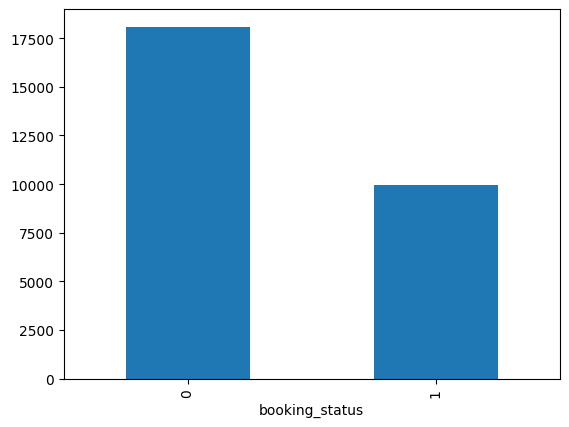

In [78]:
df_final['booking_status'].value_counts().plot(kind='bar')
plt.show()